# Quantum Harmonic Oscillator: Energy Levels
An animation of the energy levels in the quantum harmoic oscillator.

Citations:

1. Atkins, P. W. & De Paula, J. Atkins’ Physical chemistry. (W.H. Freeman, 2006). Pages 290-207.
2. [Vibration-Rotation Spectrum of HCl on HyperPhysics](http://hyperphysics.phy-astr.gsu.edu/hbase/molecule/vibrot.html#c2)

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from qho import QuantumHarmonicOscillator

## Calculating <sup>1</sup>H<sup>35</sup>Cl
The <sup>1</sup>H<sup>35</sup>Cl molecule has the following bond force constant (k) and reduced mass (m<sub>r</sub>):
$$ k = 481 N/m $$
$$ m_r = 1.627 \times 10^{-27} kg $$

### Set the values in variables

In [2]:
k = 481.  # Bond force constant
mass_r = 1.627e-27  # Reduced mass
x_min = -0.5e-10  # Minimum distance to plot in meters
x_max = 0.5e-10  # Maximum distance to plot in meters
n_points = 1000  # Number of points to to calculate between the min and max

qho = QuantumHarmonicOscillator(k=k, mass_r=mass_r)
energies = [qho.energy(v) for v in range(qho.max_v()+1)]

### Plot energy levels
Note that, for an **ideal** quantum harmonic oscillator, the energy levels are evenly spaced. Also note that, at the bottom energy level of v=0, there is still some energy in the system. This is the zero-point energy of the oscillator.

Animate the energy level going from v=0 to v=6.

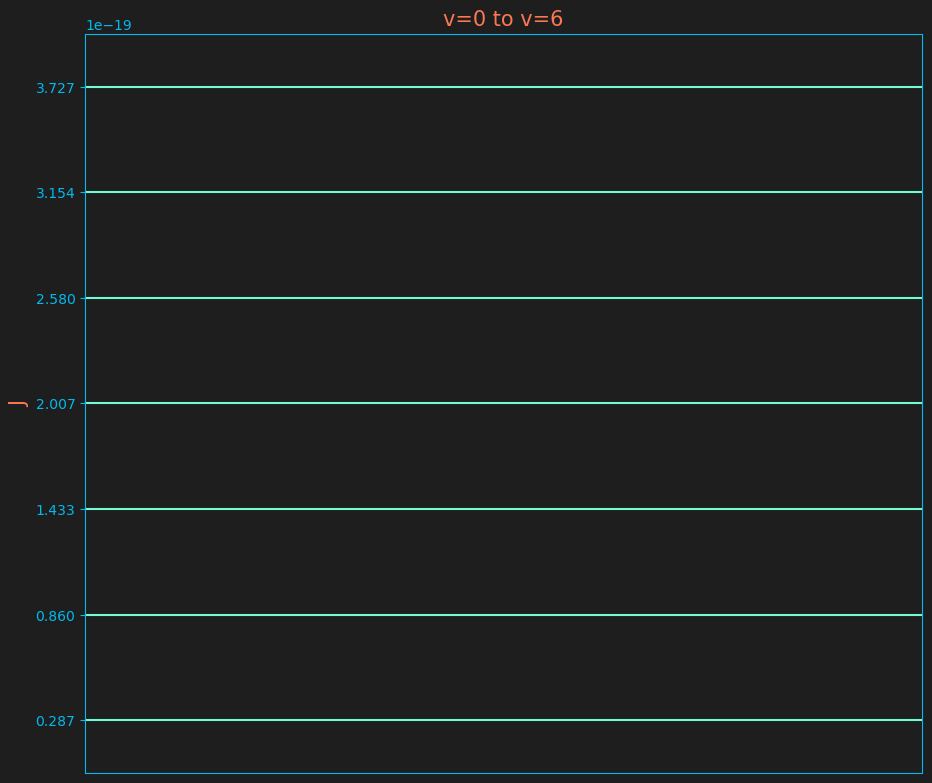

In [3]:
dpi = 100
width = 1080 / dpi
height = 1920 / 2 / dpi
num_frames = 100
bgcolor = "#1E1E1E"
line_color = "#73FBD3"
axis_color = "#01BAEF"
annotation_color = "#FFFFFF"
heading_text_color = "#FC7753"

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(width, height), dpi=dpi)

ax.set_facecolor(bgcolor)
fig.set_facecolor(bgcolor)
ax.tick_params(axis='y', colors=axis_color)

for spine_direction in ["top", "right", "bottom", "left"]:
    ax.spines[spine_direction].set_color(axis_color)

ax.set_ylim(0., max(energies)+energies[0])
ax.set_xticks([])
ax.set_yticks(energies)
ax.set_ylabel('J', size=15, color=heading_text_color)
ax.set_title(f'v=0 to v={qho.max_v()}', size=15, color=heading_text_color)
energy_axhlines = [ax.axhline(energy, color=bgcolor) for energy in energies]
energy_axhline_appearance_frames = [num_frames/len(energy_axhlines)*i for i in range(len(energy_axhlines))]

def update(frame):
    for energy_axhline, appearance_frame in zip(energy_axhlines, energy_axhline_appearance_frames):
        if frame >= appearance_frame:
            energy_axhline.set_color(line_color)

ani = animation.FuncAnimation(fig=fig, func=update, frames=num_frames, interval=33)
ani.save(filename=os.path.join("output", "energy_levels.mp4"), writer="ffmpeg")